# Taiwan vs Japan Salary Analysis

This notebook analyzes and compares salary data between Taiwan and Japan for new graduates across different education levels and industries.

## Objectives
- Compare starting salaries between Taiwan and Japan
- Analyze salary differences by education level
- Examine salary variations across industries
- Calculate real salaries adjusted for purchasing power parity (PPP)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Loading salary datasets for Taiwan and Japan in both wide and long formats.

## **Taiwan**

In [12]:
#url_tw = "https://docs.google.com/spreadsheets/d/1Y4l9NZrPD0NqKhf1c56YQ53FBseg30Om5iJJ7gCbIvI/export?format=csv"
df_tw = pd.read_csv('df_tw_wide.csv')
df_tw

,Category,Category_Type,Junior High,Senior High,Junior College,University,Graduate School
0,All Employees,Total,875.00,906.25,1000.00,1062.50,1625.00
1,Male,Gender,875.00,937.50,1000.00,1062.50,1687.50
2,Female,Gender,906.25,906.25,1000.00,1062.50,1500.00
3,Small & Medium Enterprises,Enterprise Size,875.00,906.25,937.50,968.75,1312.50
4,Large Enterprises & Others,Enterprise Size,937.50,968.75,1093.75,1187.50,1718.75
5,"Agriculture, Forestry, Fishing & Animal Husbandry",Industry,NaN,875.00,NaN,968.75,1031.25
6,Mining & Quarrying,Industry,NaN,NaN,NaN,1031.25,NaN
7,Manufacturing,Industry,875.00,906.25,968.75,1062.50,1812.50
8,Electricity & Gas Supply,Industry,NaN,968.75,NaN,1343.75,1343.75
9,Water Supply & Waste Management,Industry,NaN,937.50,NaN,1000.00,1187.50


In [13]:
#url_tw = "https://docs.google.com/spreadsheets/d/1daXCj1oY3-lIt_0SOQGI0Hirvh-12IctLVzDPqjedVQ/export?format=csv"
df_tw_long = pd.read_csv("df_tw_long.csv")
df_tw_long

,Category,Category_Type,Education,Salary,Real Salary
0,All Employees,Total,Junior High,875.00,2049.780381
1,Male,Gender,Junior High,875.00,2049.780381
2,Female,Gender,Junior High,906.25,2122.986823
3,Small & Medium Enterprises,Enterprise Size,Junior High,875.00,2049.780381
4,Large Enterprises & Others,Enterprise Size,Junior High,937.50,2196.193265
...,...,...,...,...,...
115,Public Administration & Defense; Compulsory So...,Industry,Graduate School,1406.25,3294.289898
116,Education,Industry,Graduate School,1468.75,3440.702782
117,Health Care & Social Work,Industry,Graduate School,1312.50,3074.670571
118,"Arts, Entertainment & Recreation",Industry,Graduate School,1062.50,2489.019034


## **Japan**

In [14]:
#url_jp = "https://docs.google.com/spreadsheets/d/1hW-4AwQYIsk0Udb9OBRaunFOKWocX2RWmyqaFvyvtlw/export?format=csv"
df_jp = pd.read_csv("df_jp_wide.csv")
df_jp

,Category,Category_Type,Junior High,Senior High,Junior College,University,Graduate School
0,All Employees,Total,1522.068966,1362.068966,1538.810605,1712.413793,1982.068966
1,Male,Gender,1586.896552,1382.758621,1532.229083,1733.103448,2001.379310
2,Female,Gender,1455.172414,1322.068966,1542.051387,1688.965517,1917.931034
3,Small & Medium Enterprises,NaN,NaN,NaN,NaN,NaN,NaN
4,Large Enterprises & Others,NaN,NaN,NaN,NaN,NaN,NaN
5,"Agriculture, Forestry, Fishing & Animal Husbandry",NaN,NaN,NaN,NaN,NaN,NaN
6,Mining & Quarrying,Industry,NaN,1402.068966,1831.724138,2226.896552,2297.241379
7,Manufacturing,Industry,1452.413793,1354.482759,1444.830902,1694.482759,1967.586207
8,Electricity & Gas Supply,Industry,NaN,1306.206897,1484.545455,1660.000000,1833.103448
9,Water Supply & Waste Management,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_jp_long = pd.read_csv("df_jp_long.csv")
df_jp_long

,Country,Category,Category_Type,Education,Salary,Population,Real Salary
0,Japan,All Employees,Total,Junior High,1522.068966,400.0,2367.771698
1,Japan,Male,Gender,Junior High,1586.896552,200.0,2468.619247
2,Japan,Female,Gender,Junior High,1455.172414,190.0,2263.705611
3,Japan,Mining & Quarrying,Industry,Junior High,NaN,NaN,NaN
4,Japan,Manufacturing,Industry,Junior High,1452.413793,160.0,2259.414226
...,...,...,...,...,...,...,...
109,Japan,Education,Industry,Graduate School,2184.137931,1040.0,3397.704109
110,Japan,Health Care & Social Work,Industry,Graduate School,1644.137931,500.0,2557.665487
111,Japan,"Arts, Entertainment & Recreation",Industry,Graduate School,1700.689655,220.0,2645.638880
112,Japan,Other Services,Industry,Graduate School,1664.827586,1030.0,2589.850874


## Data Processing

### Outlier Detection
Defining function to identify outliers using the Interquartile Range (IQR) method.

In [16]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

### Combining Datasets
Merging Taiwan and Japan datasets for comparative analysis.

In [17]:
# Add a 'Country' column to each dataframe
df_tw_long['Country'] = 'Taiwan'
df_jp_long['Country'] = 'Japan'

# Concatenate the two melted dataframes, ignoring the original indices to avoid duplicates
df_combined_melted = pd.concat([df_tw_long, df_jp_long], ignore_index=True)

In [18]:
df_combined_melted.to_csv("df_combined.csv", index=False)

### Outlier Analysis (Nominal Salary)
Identifying outliers in nominal salary data by country and education level.

In [ ]:
outliers_salary = df_combined_melted.groupby(['Country', 'Education'])['Salary'].transform(find_outliers_iqr)

outliers_df = df_combined_melted[outliers_salary].dropna(subset=['Salary'])

print("Outliers in Nominal Salary by Country and Education Level (Industry Only):")
outliers_df

Outliers in Real Salary by Country and Education Level (Industry Only):


,Category,Category_Type,Education,Salary,Real Salary,Country,Population
4,Large Enterprises & Others,Enterprise Size,Junior High,937.500000,2196.193265,Taiwan,NaN
36,Transportation & Storage,Industry,Senior High,1062.500000,2489.019034,Taiwan,NaN
52,Large Enterprises & Others,Enterprise Size,Junior College,1093.750000,2562.225476,Taiwan,NaN
60,Transportation & Storage,Industry,Junior College,1187.500000,2781.844802,Taiwan,NaN
80,Electricity & Gas Supply,Industry,University,1343.750000,3147.877013,Taiwan,NaN
91,Public Administration & Defense; Compulsory So...,Industry,University,1281.250000,3001.464129,Taiwan,NaN
138,Combined Services,Industry,Junior High,1195.862069,1860.315417,Japan,20.0
150,Finance & Insurance,Industry,Senior High,1268.965517,1974.037120,Japan,880.0
164,Mining & Quarrying,Industry,Junior College,1831.724138,2849.479670,Japan,10.0
174,Transportation & Storage,Industry,Junior College,1330.344828,2069.520438,Japan,550.0


## Salary Distribution Visualization

Box plots showing salary distribution across education levels for both countries (Industry sector only).

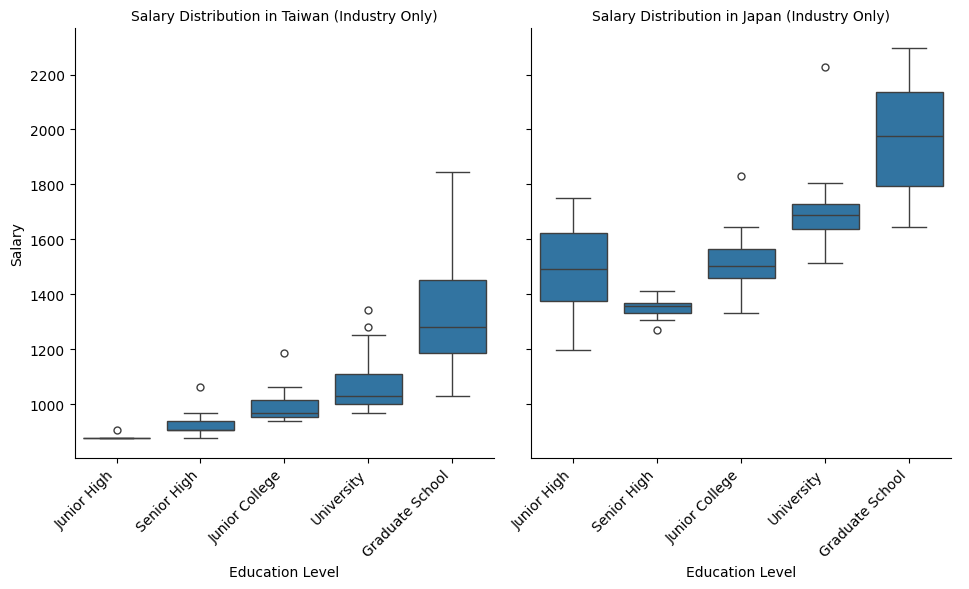

In [20]:
# Define the order of education levels for plotting
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']

# Create combined box plot using catplot for faceted layout
g = sns.catplot(x='Education', y='Salary', col='Country', data=df_combined_melted[df_combined_melted['Category_Type'] == 'Industry'],
                kind='box', col_order=['Taiwan', 'Japan'], order=education_order,
                height=6, aspect=0.8, sharey=True)

g.set_axis_labels('Education Level', 'Salary')
g.set_titles('Salary Distribution in {col_name} (Industry Only)')
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Salary Comparison by Education Level
Comparing average starting salaries between Taiwan and Japan across all education levels.

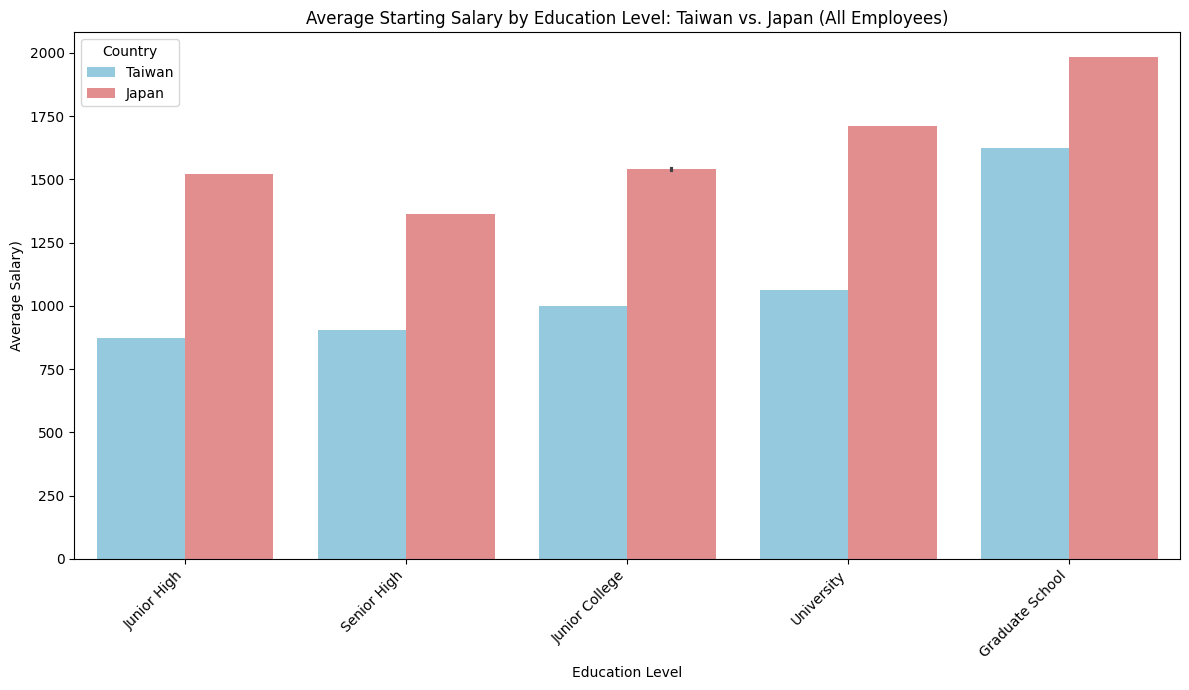

In [21]:
# Define the order of education levels for plotting
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Education',
    y='Salary',
    hue='Country',
    data=df_combined_melted[df_combined_melted['Category'] == 'All Employees'],
    order=education_order,
    palette={'Taiwan': 'skyblue', 'Japan': 'lightcoral'}
)
plt.title('Average Starting Salary by Education Level: Taiwan vs. Japan (All Employees)')
plt.xlabel('Education Level')
plt.ylabel('Average Salary)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### Percentage Difference Analysis
Analyzing how much higher Japanese new graduate salaries are compared to Taiwan by education level.

In [22]:
from IPython.display import display

# Filter for 'All Employees' category from the combined long dataframe
df_all_employees = df_combined_melted[df_combined_melted['Category'] == 'All Employees']

# Calculate the average Real_Salary for 'All Employees' by Country and Education Level
average_salaries = df_all_employees.groupby(['Country', 'Education'])['Salary'].mean().unstack(level=0)

# Define the order of education levels for presentation
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']
average_salaries = average_salaries.reindex(education_order)

# Calculate the percentage difference: ((Japan - Taiwan) / Taiwan) * 100
average_salaries['Percentage_Difference_Japan_vs_Taiwan'] = \
    ((average_salaries['Japan'] - average_salaries['Taiwan']) / average_salaries['Taiwan']) * 100

print("Percentage Difference in Average Salaries for New Graduates: Japan vs. Taiwan (All Employees):")
display(average_salaries[['Japan', 'Taiwan', 'Percentage_Difference_Japan_vs_Taiwan']].round(2))

Percentage Difference in Average Salaries for New Graduates: Japan vs. Taiwan (All Employees):


Country,Japan,Taiwan,Percentage_Difference_Japan_vs_Taiwan
Education,,,
Junior High,1522.07,875.00,73.95
Senior High,1362.07,906.25,50.30
Junior College,1540.34,1000.00,54.03
University,1712.41,1062.50,61.17
Graduate School,1982.07,1625.00,21.97


Visualizing the percentage difference between Japan and Taiwan salaries.

C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\1221372598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


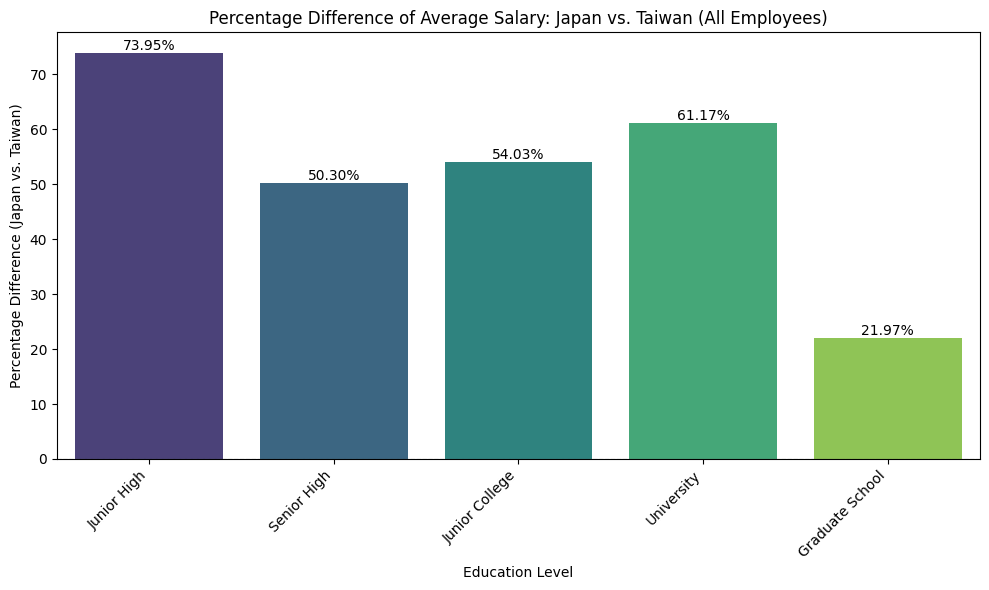

In [23]:
# 確保中文字符顯示正常
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Education',
    y='Percentage_Difference_Japan_vs_Taiwan',
    data=average_salaries,
    order=education_order,
    palette='viridis'
)

plt.title('Percentage Difference of Average Salary: Japan vs. Taiwan (All Employees)')
plt.xlabel('Education Level')
plt.ylabel('Percentage Difference (Japan vs. Taiwan)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a zero line for reference

# 在每個長條上方顯示數值
for index, row in average_salaries.iterrows():
    plt.text(index, row['Percentage_Difference_Japan_vs_Taiwan'], f"{row['Percentage_Difference_Japan_vs_Taiwan']:.2f}%",
             color='black', ha="center", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Education Uplift Analysis

Calculating salary growth when moving from one education level to the next.

各國學歷提升帶來的薪資成長幅度 (%):
                    Taiwan      Japan
Senior High       3.571429 -10.512007
Junior College   10.344828  13.088608
University            6.25  11.170808
Graduate School  52.941176   15.74708


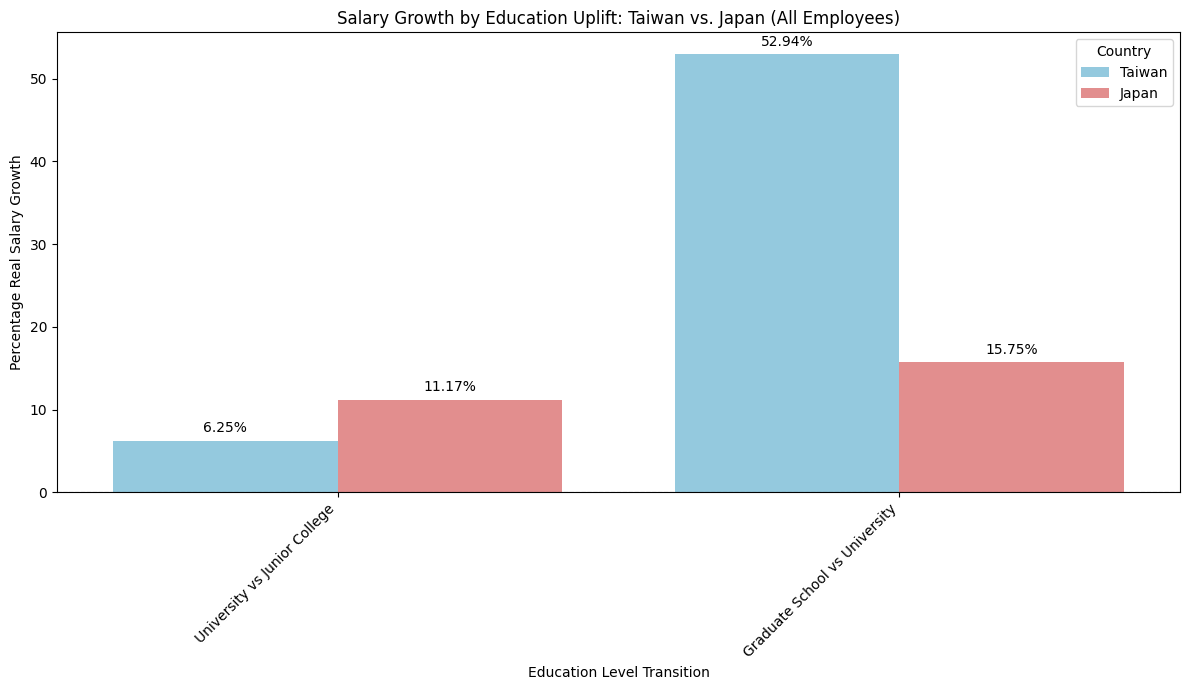

In [24]:
# Calculate education uplift for each country

education_uplift = pd.DataFrame(index=education_order[1:], columns=['Taiwan', 'Japan'])

for i in range(1, len(education_order)):
    current_level = education_order[i]
    previous_level = education_order[i-1]

    # Calculate for Taiwan
    salary_tw_current = average_salaries.loc[current_level, 'Taiwan']
    salary_tw_previous = average_salaries.loc[previous_level, 'Taiwan']
    if not pd.isna(salary_tw_current) and not pd.isna(salary_tw_previous) and salary_tw_previous != 0:
        education_uplift.loc[current_level, 'Taiwan'] = ((salary_tw_current - salary_tw_previous) / salary_tw_previous) * 100
    else:
        education_uplift.loc[current_level, 'Taiwan'] = np.nan

    # Calculate for Japan
    salary_jp_current = average_salaries.loc[current_level, 'Japan']
    salary_jp_previous = average_salaries.loc[previous_level, 'Japan']
    if not pd.isna(salary_jp_current) and not pd.isna(salary_jp_previous) and salary_jp_previous != 0:
        education_uplift.loc[current_level, 'Japan'] = ((salary_jp_current - salary_jp_previous) / salary_jp_previous) * 100
    else:
        education_uplift.loc[current_level, 'Japan'] = np.nan

print("各國學歷提升帶來的薪資成長幅度 (%):")
print(education_uplift.round(2))

# Prepare data for plotting
df_uplift_plot = education_uplift.reset_index().melt(id_vars='index', var_name='Country', value_name='Percentage_Growth')
df_uplift_plot = df_uplift_plot.rename(columns={'index': 'Education_Transition'})

# Define the order for x-axis labels
transition_labels = [
    'University vs Junior College',
    'Graduate School vs University'
]

# Map education levels to transition labels for better readability on plot
def map_transition_label(edu_level):
    if edu_level == 'Senior High': return 'Senior High vs Junior High'
    if edu_level == 'Junior College': return 'Junior College vs Senior High'
    if edu_level == 'University': return 'University vs Junior College'
    if edu_level == 'Graduate School': return 'Graduate School vs University'
    return edu_level

df_uplift_plot['Education_Transition'] = df_uplift_plot['Education_Transition'].apply(map_transition_label)

# Filter df_uplift_plot to only include the desired transitions
df_uplift_plot_filtered = df_uplift_plot[df_uplift_plot['Education_Transition'].isin(transition_labels)]

# Create the grouped bar chart for education uplift
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Education_Transition',
    y='Percentage_Growth',
    hue='Country',
    data=df_uplift_plot_filtered, # Use the filtered DataFrame here
    order=transition_labels,
    palette={'Taiwan': 'skyblue', 'Japan': 'lightcoral'}
)

plt.title('Salary Growth by Education Uplift: Taiwan vs. Japan (All Employees)')
plt.xlabel('Education Level Transition')
plt.ylabel('Percentage Real Salary Growth')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title='Country')

# Add numerical labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height != 0: # Only annotate bars with non-zero height
        ax.annotate(f'{height:.2f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

## Industry Analysis (Nominal Salary)

Comparing nominal salaries across different industries between Taiwan and Japan.

In [ ]:
# Filter for 'Industry' category type from the combined long dataframe
df_industry_combined = df_combined_melted[df_combined_melted['Category_Type'] == 'Industry'].copy()

# Handle NaN in Salary or Population before calculations to avoid issues with weighted average
df_industry_combined.dropna(subset=['Salary'], inplace=True)

# Calculate weighted average for Japan
df_jp_industry = df_industry_combined[df_industry_combined['Country'] == 'Japan'].copy()
# For weighted average, drop rows where Population is NaN or 0, as they cannot contribute to weight
df_jp_industry.dropna(subset=['Population'], inplace=True)
df_jp_industry = df_jp_industry[df_jp_industry['Population'] > 0]

# Group by Category and calculate the weighted average real salary for Japan
# Weighted average = sum(Real_Salary * population) / sum(population)
weighted_avg_jp = df_jp_industry.groupby('Category').apply(lambda x: (x['Salary'] * x['Population']).sum() / x['Population'].sum())
weighted_avg_jp = weighted_avg_jp.rename('Japan_Weighted_Average').to_frame()

# Calculate simple average for Taiwan (as population data is not available)
df_tw_industry = df_industry_combined[df_industry_combined['Country'] == 'Taiwan'].copy()
simple_avg_tw = df_tw_industry.groupby('Category')['Salary'].mean().rename('Taiwan_Average').to_frame()

# Combine the averages into a single DataFrame
industry_average_salaries_weighted = pd.merge(simple_avg_tw, weighted_avg_jp, left_index=True, right_index=True, how='outer')

# Rename columns for clarity
industry_average_salaries_weighted.rename(columns={'Taiwan_Average': 'Taiwan', 'Japan_Weighted_Average': 'Japan'}, inplace=True)

# Calculate the percentage difference: ((Japan - Taiwan) / Taiwan) * 100
industry_average_salaries_weighted['Percentage_Difference_Japan_vs_Taiwan'] = \
    ((industry_average_salaries_weighted['Japan'] - industry_average_salaries_weighted['Taiwan']) / industry_average_salaries_weighted['Taiwan']) * 100

# Sort by the percentage difference to find the largest gaps
industry_salary_gap_weighted = industry_average_salaries_weighted.sort_values(by='Percentage_Difference_Japan_vs_Taiwan', ascending=False)

print("Percentage by which average nominal salaries in Japan exceed those in Taiwan, by industry (Japan weighted by population, Taiwan simple average - descending order):")
display(industry_salary_gap_weighted[['Japan', 'Taiwan', 'Percentage_Difference_Japan_vs_Taiwan']].round(2))

Percentage by which average real salaries in Japan exceed those in Taiwan, by industry (Japan weighted by population, Taiwan simple average - descending order):


C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\142041150.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_jp = df_jp_industry.groupby('Category').apply(lambda x: (x['Salary'] * x['Population']).sum() / x['Population'].sum())


,Japan,Taiwan,Percentage_Difference_Japan_vs_Taiwan
Category,,,
Mining & Quarrying,1924.19,1031.25,86.59
Real Estate,1783.23,1000.00,78.32
Construction,1581.35,981.25,61.16
Wholesale & Retail Trade,1625.78,1025.00,58.61
"Professional, Scientific & Technical Services",1724.53,1093.75,57.67
Other Services,1511.68,968.75,56.04
Accommodation & Food Service,1517.00,975.00,55.59
"Arts, Entertainment & Recreation",1504.84,968.75,55.34
Health Care & Social Work,1694.36,1132.81,49.57


### Industry Salary Gap Visualization (Nominal)
Visualizing the percentage difference in nominal salaries by industry between Japan and Taiwan.

C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\3711057662.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


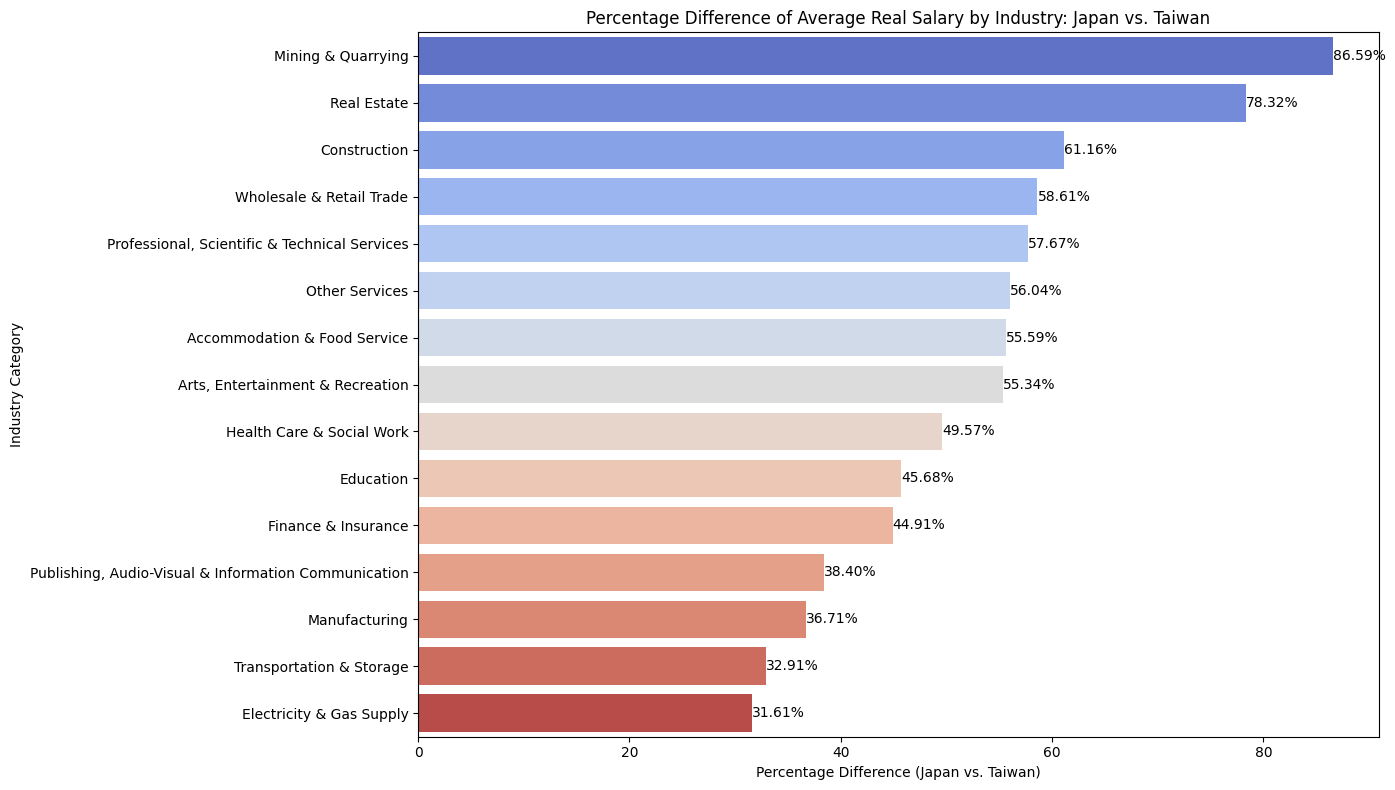

In [26]:
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter out rows where Percentage_Difference_Japan_vs_Taiwan is NaN (where either Japan or Taiwan salary was NaN)
df_plot_industry_gap = industry_salary_gap_weighted.dropna(subset=['Percentage_Difference_Japan_vs_Taiwan']).reset_index()

# Create the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Percentage_Difference_Japan_vs_Taiwan',
    y='Category',
    data=df_plot_industry_gap,
    palette='coolwarm' # Using a diverging palette to show positive/negative differences
)

plt.title('Percentage Difference of Average Real Salary by Industry: Japan vs. Taiwan')
plt.xlabel('Percentage Difference (Japan vs. Taiwan)')
plt.ylabel('Industry Category')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Add a zero line for reference

# Add values on the bars for clarity
for index, row in df_plot_industry_gap.iterrows():
    plt.text(row['Percentage_Difference_Japan_vs_Taiwan'], index,
             f"{row['Percentage_Difference_Japan_vs_Taiwan']:.2f}%",
             color='black', va='center', ha='left' if row['Percentage_Difference_Japan_vs_Taiwan'] >= 0 else 'right')

plt.tight_layout()
plt.show()

## Real Salary Analysis (PPP Adjusted)

Analyzing salaries adjusted for purchasing power parity to reflect true buying power.

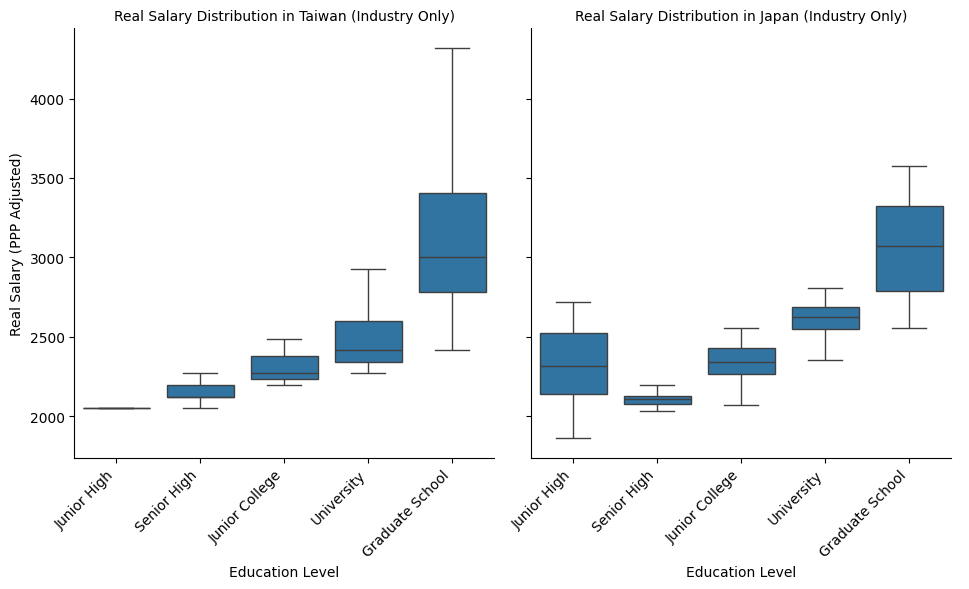

In [28]:
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']

# Create combined box plot using catplot for faceted layout
g = sns.catplot(x='Education', y='Real Salary', col='Country',
                data=df_combined_melted[df_combined_melted['Category_Type'] == 'Industry'],
                kind='box', col_order=['Taiwan', 'Japan'], order=education_order,
                height=6, aspect=0.8, sharey=True, showfliers=False) # Hide default outliers

g.set_axis_labels('Education Level', 'Real Salary (PPP Adjusted)')
g.set_titles('Real Salary Distribution in {col_name} (Industry Only)')
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Real Salary Outliers (PPP Adjusted)
Identifying outliers in PPP-adjusted salary data.

In [ ]:
outliers_real_salary = df_combined_melted.groupby(['Country', 'Education'])['Real Salary'].transform(find_outliers_iqr)

outliers_df_real = df_combined_melted[outliers_real_salary].dropna(subset=['Real Salary'])

print("Outliers in Real Salary (PPP Adjusted) by Country and Education Level (Industry Only):")
outliers_df_real

Outliers in Real Salary by Country and Education Level (Industry Only):


,Category,Category_Type,Education,Salary,Real Salary,Country,Population
4,Large Enterprises & Others,Enterprise Size,Junior High,937.500000,2196.193265,Taiwan,NaN
36,Transportation & Storage,Industry,Senior High,1062.500000,2489.019034,Taiwan,NaN
52,Large Enterprises & Others,Enterprise Size,Junior College,1093.750000,2562.225476,Taiwan,NaN
60,Transportation & Storage,Industry,Junior College,1187.500000,2781.844802,Taiwan,NaN
80,Electricity & Gas Supply,Industry,University,1343.750000,3147.877013,Taiwan,NaN
91,Public Administration & Defense; Compulsory So...,Industry,University,1281.250000,3001.464129,Taiwan,NaN
138,Combined Services,Industry,Junior High,1195.862069,1860.315417,Japan,20.0
150,Finance & Insurance,Industry,Senior High,1268.965517,1974.037120,Japan,880.0
164,Mining & Quarrying,Industry,Junior College,1831.724138,2849.479670,Japan,10.0
174,Transportation & Storage,Industry,Junior College,1330.344828,2069.520438,Japan,550.0


### Real Salary by Education Level
Comparing PPP-adjusted salaries across education levels.

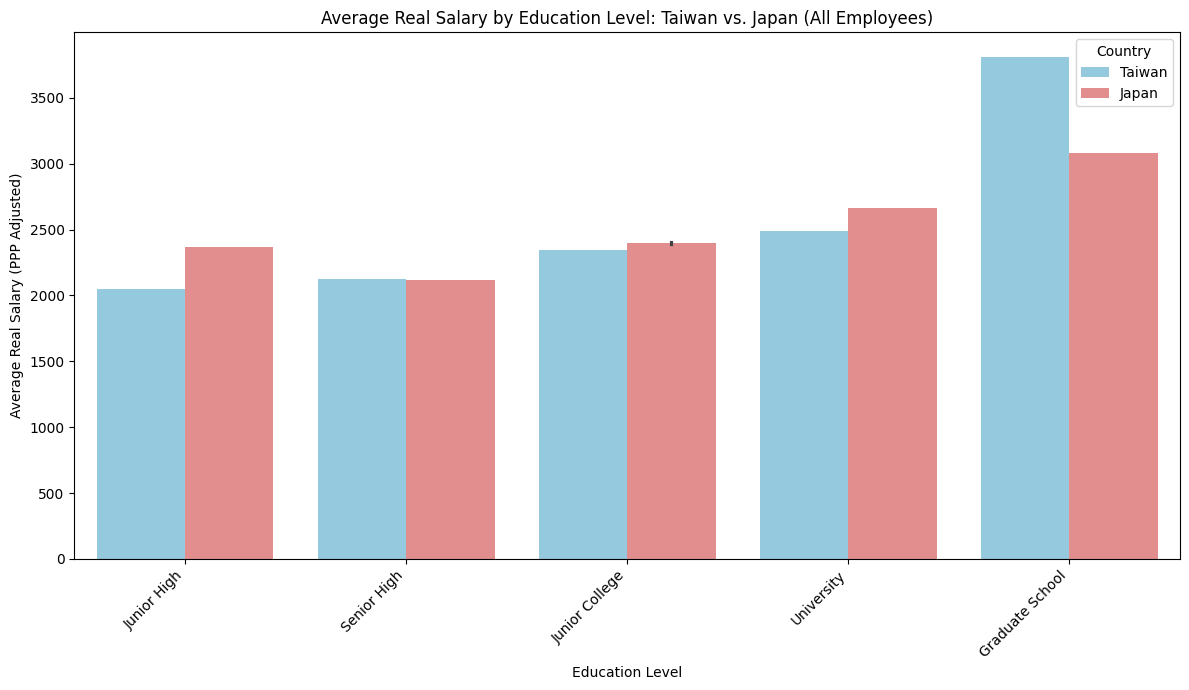

In [30]:
# Define the order of education levels for plotting
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Education',
    y='Real Salary',
    hue='Country',
    data=df_combined_melted[df_combined_melted['Category'] == 'All Employees'],
    order=education_order,
    palette={'Taiwan': 'skyblue', 'Japan': 'lightcoral'}
)
plt.title('Average Real Salary by Education Level: Taiwan vs. Japan (All Employees)')
plt.xlabel('Education Level')
plt.ylabel('Average Real Salary (PPP Adjusted)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### Real Salary Percentage Difference
Calculating percentage differences in PPP-adjusted salaries between countries.

In [31]:
# Filter for 'All Employees' category from the combined long dataframe
df_all_employees = df_combined_melted[df_combined_melted['Category'] == 'All Employees']

# Calculate the average Real_Salary for 'All Employees' by Country and Education Level
average_salaries_real = df_all_employees.groupby(['Country', 'Education'])['Real Salary'].mean().unstack(level=0)

# Define the order of education levels for presentation
education_order = ['Junior High', 'Senior High', 'Junior College', 'University', 'Graduate School']
average_salaries_real = average_salaries_real.reindex(education_order)

# Calculate the percentage difference: ((Japan - Taiwan) / Taiwan) * 100
average_salaries_real['Percentage_Difference_Japan_vs_Taiwan'] = \
    ((average_salaries_real['Japan'] - average_salaries_real['Taiwan']) / average_salaries_real['Taiwan']) * 100

print("Percentage Difference in Average Real Salaries for New Graduates: Japan vs. Taiwan (All Employees):")
display(average_salaries_real[['Japan', 'Taiwan', 'Percentage_Difference_Japan_vs_Taiwan']].round(2))

Percentage Difference in Average Real Salaries for New Graduates: Japan vs. Taiwan (All Employees):


Country,Japan,Taiwan,Percentage_Difference_Japan_vs_Taiwan
Education,,,
Junior High,2367.77,2049.78,15.51
Senior High,2118.87,2122.99,-0.19
Junior College,2396.20,2342.61,2.29
University,2663.88,2489.02,7.03
Graduate School,3083.36,3806.73,-19.00


C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\3153028161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


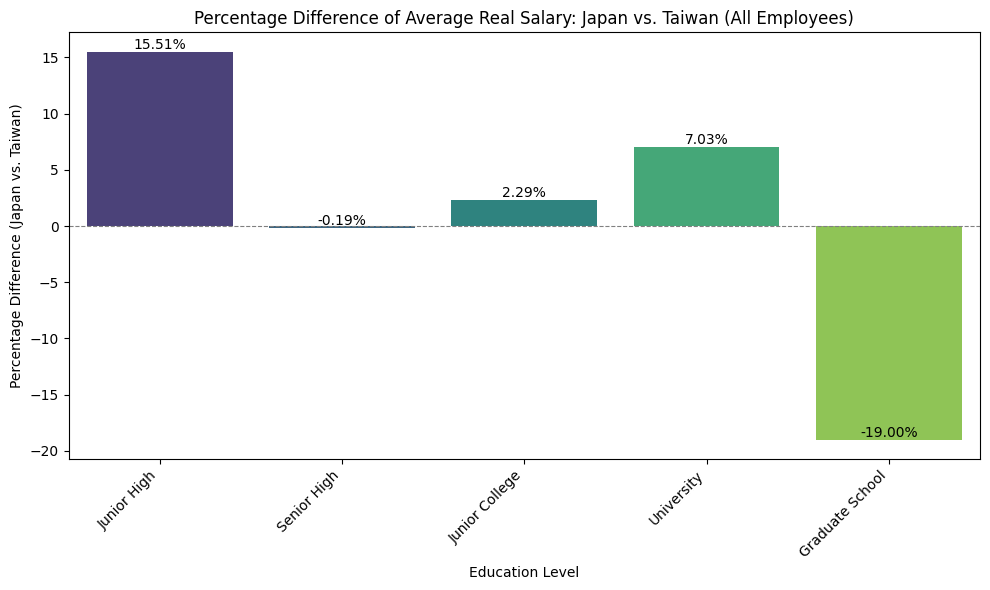

In [32]:
# 確保中文字符顯示正常
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Education',
    y='Percentage_Difference_Japan_vs_Taiwan',
    data=average_salaries_real,
    order=education_order,
    palette='viridis'
)

plt.title('Percentage Difference of Average Real Salary: Japan vs. Taiwan (All Employees)')
plt.xlabel('Education Level')
plt.ylabel('Percentage Difference (Japan vs. Taiwan)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a zero line for reference

# 在每個長條上方顯示數值
for index, row in average_salaries_real.iterrows():
    plt.text(index, row['Percentage_Difference_Japan_vs_Taiwan'], f"{row['Percentage_Difference_Japan_vs_Taiwan']:.2f}%",
             color='black', ha="center", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [33]:
average_salaries_real

Country,Japan,Taiwan,Percentage_Difference_Japan_vs_Taiwan
Education,,,
Junior High,2367.771698,2049.780381,15.513434
Senior High,2118.871366,2122.986823,-0.193852
Junior College,2396.202124,2342.606149,2.287878
University,2663.877266,2489.019034,7.025187
Graduate School,3083.360154,3806.734993,-19.002501


### Real Salary by Industry (PPP Adjusted)
Industry-level comparison of PPP-adjusted salaries.

In [ ]:
# Filter for 'Industry' category type from the combined long dataframe
df_industry_combined = df_combined_melted[df_combined_melted['Category_Type'] == 'Industry'].copy()

# Handle NaN in Real Salary or Population before calculations to avoid issues with weighted average
df_industry_combined.dropna(subset=['Real Salary'], inplace=True)

# Calculate weighted average for Japan
df_jp_industry = df_industry_combined[df_industry_combined['Country'] == 'Japan'].copy()
# For weighted average, drop rows where Population is NaN or 0, as they cannot contribute to weight
df_jp_industry.dropna(subset=['Population'], inplace=True)
df_jp_industry = df_jp_industry[df_jp_industry['Population'] > 0]

# Group by Category and calculate the weighted average real salary for Japan
# Weighted average = sum(Real_Salary * population) / sum(population)
weighted_avg_jp = df_jp_industry.groupby('Category').apply(lambda x: (x['Real Salary'] * x['Population']).sum() / x['Population'].sum())
weighted_avg_jp = weighted_avg_jp.rename('Japan_Weighted_Average').to_frame()

# Calculate simple average for Taiwan (as population data is not available)
df_tw_industry = df_industry_combined[df_industry_combined['Country'] == 'Taiwan'].copy()
simple_avg_tw = df_tw_industry.groupby('Category')['Real Salary'].mean().rename('Taiwan_Average').to_frame()

# Combine the averages into a single DataFrame
industry_average_salaries_weighted = pd.merge(simple_avg_tw, weighted_avg_jp, left_index=True, right_index=True, how='outer')

# Rename columns for clarity
industry_average_salaries_weighted.rename(columns={'Taiwan_Average': 'Taiwan', 'Japan_Weighted_Average': 'Japan'}, inplace=True)

# Calculate the percentage difference: ((Japan - Taiwan) / Taiwan) * 100
industry_average_salaries_weighted['Percentage_Difference_Japan_vs_Taiwan'] = \
    ((industry_average_salaries_weighted['Japan'] - industry_average_salaries_weighted['Taiwan']) / industry_average_salaries_weighted['Taiwan']) * 100

# Sort by the percentage difference to find the largest gaps
industry_salary_gap_weighted = industry_average_salaries_weighted.sort_values(by='Percentage_Difference_Japan_vs_Taiwan', ascending=False)

print("Percentage by which average real salaries in Japan exceed those in Taiwan, by industry (Japan weighted by population, Taiwan simple average - descending order):")
display(industry_salary_gap_weighted[['Japan', 'Taiwan', 'Percentage_Difference_Japan_vs_Taiwan']].round(2))

Percentage by which average real salaries in Japan exceed those in Taiwan, by industry (Japan weighted by population, Taiwan simple average - descending order):


C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\1498933254.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_jp = df_jp_industry.groupby('Category').apply(lambda x: (x['Real Salary'] * x['Population']).sum() / x['Population'].sum())


,Japan,Taiwan,Percentage_Difference_Japan_vs_Taiwan
Category,,,
Mining & Quarrying,2993.32,2415.81,23.91
Real Estate,2774.04,2342.61,18.42
Construction,2459.99,2298.68,7.02
Wholesale & Retail Trade,2529.10,2401.17,5.33
"Professional, Scientific & Technical Services",2682.72,2562.23,4.70
Other Services,2351.60,2269.40,3.62
Accommodation & Food Service,2359.89,2284.04,3.32
"Arts, Entertainment & Recreation",2340.97,2269.40,3.15
Health Care & Social Work,2635.79,2653.73,-0.68


C:\Users\chen.yi.chieh\AppData\Local\Temp\ipykernel_19284\3711057662.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


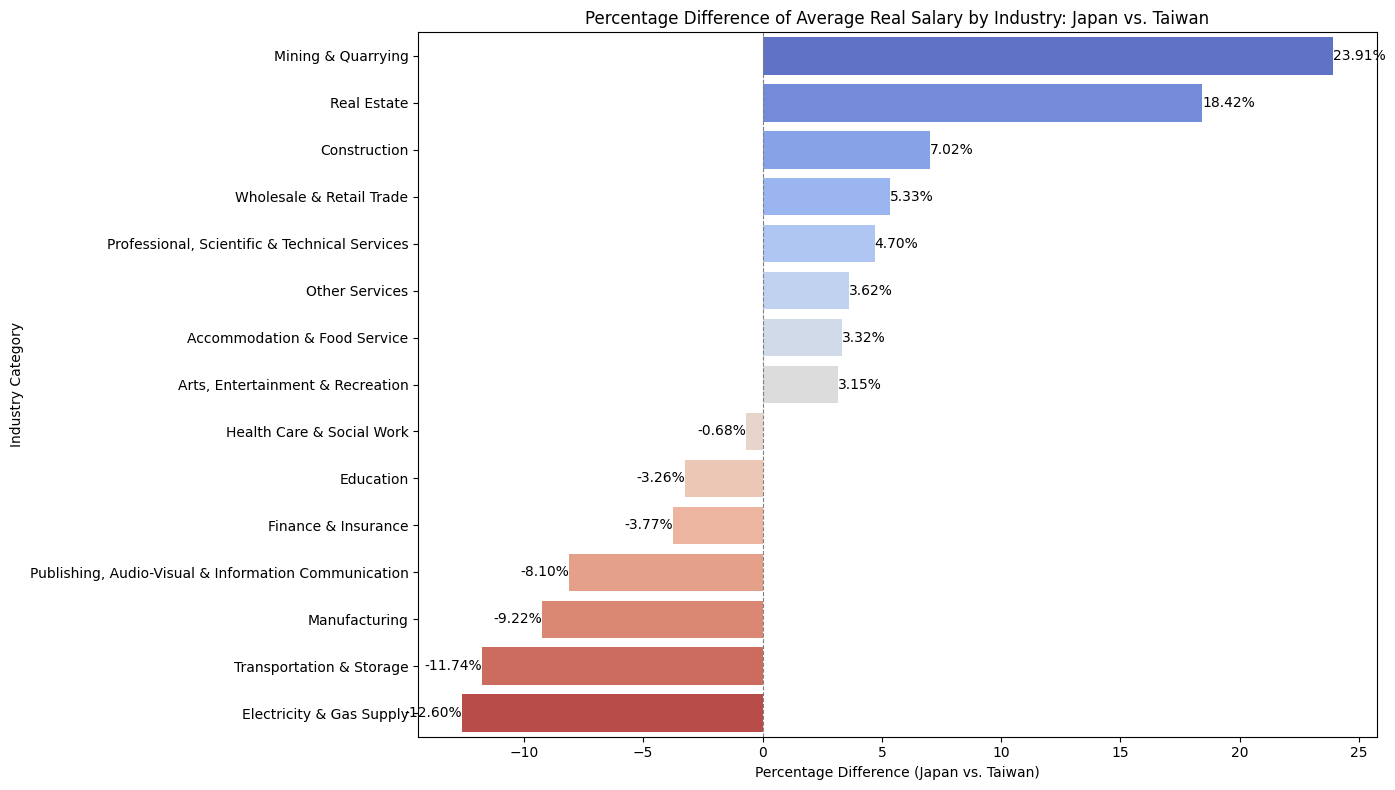

In [36]:
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter out rows where Percentage_Difference_Japan_vs_Taiwan is NaN (where either Japan or Taiwan salary was NaN)
df_plot_industry_gap = industry_salary_gap_weighted.dropna(subset=['Percentage_Difference_Japan_vs_Taiwan']).reset_index()

# Create the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Percentage_Difference_Japan_vs_Taiwan',
    y='Category',
    data=df_plot_industry_gap,
    palette='coolwarm' # Using a diverging palette to show positive/negative differences
)

plt.title('Percentage Difference of Average Real Salary by Industry: Japan vs. Taiwan')
plt.xlabel('Percentage Difference (Japan vs. Taiwan)')
plt.ylabel('Industry Category')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Add a zero line for reference

# Add values on the bars for clarity
for index, row in df_plot_industry_gap.iterrows():
    plt.text(row['Percentage_Difference_Japan_vs_Taiwan'], index,
             f"{row['Percentage_Difference_Japan_vs_Taiwan']:.2f}%",
             color='black', va='center', ha='left' if row['Percentage_Difference_Japan_vs_Taiwan'] >= 0 else 'right')

plt.tight_layout()
plt.show()

---

## Key Findings

### Summary of Nominal Salary Comparison

**Japan vs Taiwan Salary Gap:**
- Japanese new graduates earn significantly more than their Taiwanese counterparts across all education levels
- The gap increases with higher education levels  
- Graduate school graduates in Japan earn approximately 52-53% more than in Taiwan

### Real Salary Analysis (PPP Adjusted)

**Purchasing Power Comparison:**
- When adjusted for purchasing power, the gap narrows but remains substantial
- Graduate school graduates still show significant advantage in Japan
- Some industries in Taiwan show competitive real salaries despite lower nominal values

### Industry Insights

**Sector-by-Sector Analysis:**
- Technology and specialized industries show varying salary gaps
- Some industries in Taiwan offer competitive compensation when adjusted for cost of living
- Weighted averages account for population distribution across industries in Japan

### Methodology Notes

**Data Analysis Approach:**
- **Taiwan salary data:** Simple averages across industries (population data unavailable)
- **Japan salary data:** Weighted averages by population for more accurate representation
- **PPP adjustment:** Provides a more realistic comparison of actual purchasing power
- **Outlier detection:** Using IQR method to ensure data quality

**Data Sources:**
- Taiwan: Government labor statistics
- Japan: Official employment surveys  
- PPP conversion factors from international databases